In [1]:
import pandas as pd
import numpy as np

# Load the data from the Excel file
data_sheet = pd.read_excel('Global_Financial_Development_Database.xlsx')

# Calculate the correlation matrix to find the best pairs of columns for linear regression
numeric_data = data_sheet.select_dtypes(include=[np.number])

# Calculate the correlation matrix to find the best pairs of columns for linear regression
correlation_matrix = numeric_data.corr()

# Select the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find pairs of columns with the highest correlation coefficients
high_correlation_pairs = upper_triangle.stack().sort_values(ascending=False)

# Filter and display the top 10 pairs with the highest correlation coefficients
top_10_pairs = high_correlation_pairs.head(70)

# Filter column names starting with 'a' or 'd'
filtered_pairs = top_10_pairs[top_10_pairs.index.get_level_values(0).str.startswith(('a', 'd')) 
                              & top_10_pairs.index.get_level_values(1).str.startswith(('a', 'd'))]

# Print the filtered pairs
print(filtered_pairs)

# Select the best pair for linear regression
best_pair = filtered_pairs.index[0]
column1, column2 = best_pair

print(f"Best columns for linear regression: {column1} and {column2}")

ai01  ai25    0.983578
ai03  ai04    0.971387
di01  di12    0.961662
      di02    0.961380
ai10  ai24    0.958142
dm05  dm07    0.954033
ai02  ai25    0.951541
ai01  ai02    0.951524
ai05  ai21    0.938269
di02  di12    0.928370
di05  di08    0.922856
ai11  ai21    0.919914
ai29  ai35    0.916513
ai21  ai22    0.909485
ai11  ai22    0.894896
ai05  ai22    0.890884
      ai11    0.885561
ai06  ai11    0.865138
ai28  ai34    0.864621
ai06  ai22    0.845817
ai11  ai20    0.838851
ai06  ai20    0.837401
ai07  ai20    0.830942
ai05  ai06    0.828884
ai06  ai21    0.825395
ai03  ai29    0.825370
ai20  ai22    0.825205
ai07  ai11    0.821450
dm01  dm02    0.820997
ai06  ai12    0.816242
di05  di07    0.814101
ai07  ai22    0.810630
ai05  ai20    0.798372
ai03  ai35    0.797157
ai20  ai21    0.795219
ai04  ai29    0.793575
am01  am02    0.793133
dm12  dm13    0.790041
ai06  ai07    0.778030
di02  di08    0.776138
di09  di11    0.775925
di03  di11    0.771483
ai04  ai35    0.762185
di07  dm09 

In [4]:
financial_system_deposits = data_sheet['ai03']
bank_deposits = data_sheet['di02']

# Drop rows with missing values
data = pd.DataFrame({'ai03': financial_system_deposits, 
                     'di02': bank_deposits}).dropna()

In [5]:
data.head()

,ai03,di02
110,3.4,10.256330
116,5.1,3.721632
170,4.1,8.063166
174,9.5,33.381530
233,42.2,56.709900


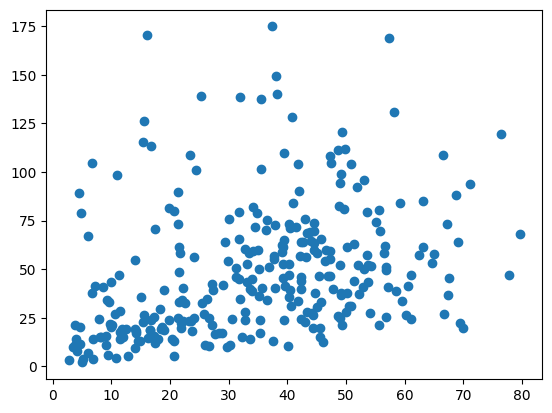

In [6]:
import matplotlib.pyplot as plt
plt.scatter(data['ai03'], data['di02'])

In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(data[['ai03']], data[['di02']])
model.score(data[['ai03']], data[['di02']])



0.10775681311948704

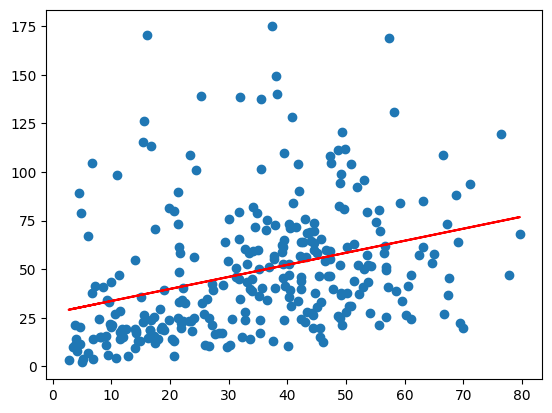

In [9]:
predictions = model.predict(data[['ai03']])
plt.scatter(data['ai03'], data['di02'])
plt.plot(data['ai03'], predictions, color='red')



In [10]:
data.filter(['ai03', 'di11']).describe(percentiles=[0.25,0.5,0.75,0.95]).T

,count,mean,std,min,25%,50%,75%,95%,max
ai03,292.0,34.548973,17.728191,2.7,19.9,35.5,47.3,63.875,79.6


In [11]:
data_z = data_sheet[['year', 'si01']]
data_z1 = data_sheet[['year', 'si01']]

In [12]:
data_z.head()

,year,si01
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN


In [13]:
data_z = pd.DataFrame({'si01': data_z['si01']}).dropna()

In [14]:
data_z['year']=data_sheet['year']
data_z.head()

,si01,year
108,48.99729,2006
109,31.96604,2007
110,19.94573,2008
111,26.69275,2009
112,24.95099,2010


In [15]:
data_z = data_z[data_z['year'] > 2006]
data_z.describe().T

,count,mean,std,min,25%,50%,75%,max
si01,2343.0,16.576487,9.528736,-0.325974,9.590345,15.33082,20.523035,66.63377
year,2343.0,2014.016219,4.256877,2007.000000,2010.000000,2014.00000,2018.000000,2021.00000


In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data.head()
reg_ols=smf.ols("ai03 ~ di02",data=data).fit()
print(reg_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                   ai03   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     35.02
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           9.18e-09
Time:                        11:42:14   Log-Likelihood:                -1236.7
No. Observations:                 292   AIC:                             2477.
Df Residuals:                     290   BIC:                             2485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0437      1.740     14.964      0.0

In [19]:
hetero_reg=smf.ols("ai03 ~ di02",data=data).fit(cov_type="HC3")
print(hetero_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   ai03   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     26.13
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           5.80e-07
Time:                        11:42:34   Log-Likelihood:                -1236.7
No. Observations:                 292   AIC:                             2477.
Df Residuals:                     290   BIC:                             2485.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0437      1.849     14.085      0.0

In [20]:
data["acess"]=reg_ols.fittedvalues
data["e"]=reg_ols.resid

In [21]:
data.head()

,ai03,di02,acess,e
110,3.4,10.256330,27.828114,-24.428114
116,5.1,3.721632,26.691209,-21.591209
170,4.1,8.063166,27.446548,-23.346548
174,9.5,33.381530,31.851427,-22.351427
233,42.2,56.709900,35.910088,6.289912


In [22]:
data['Region']=data_sheet['region']
data['Country']=data_sheet['country']


In [23]:
data.head()

,ai03,di02,acess,e,Region,Country
110,3.4,10.256330,27.828114,-24.428114,South Asia,Afghanistan
116,5.1,3.721632,26.691209,-21.591209,South Asia,Afghanistan
170,4.1,8.063166,27.446548,-23.346548,Sub-Saharan Africa,Angola
174,9.5,33.381530,31.851427,-22.351427,Sub-Saharan Africa,Angola
233,42.2,56.709900,35.910088,6.289912,Europe & Central Asia,Albania


In [24]:
data.sort_values(by='e',ascending=False).head()

,ai03,di02,acess,e,Region,Country
9295,77.8,46.87016,34.198174,43.601826,Latin America & Caribbean,Peru
2158,79.6,68.09574,37.890992,41.709008,Latin America & Caribbean,Chile
9284,69.9,19.61400,29.456157,40.443843,Latin America & Caribbean,Peru
2973,69.4,22.18176,29.902895,39.497105,Europe & Central Asia,Cyprus
9288,66.8,27.08393,30.755773,36.044227,Latin America & Caribbean,Peru


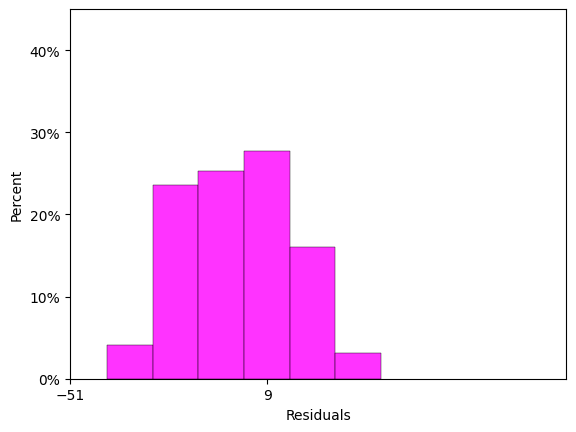

In [25]:
import seaborn as sns # type: ignore
sns.histplot(data=data, x='e', binwidth=15, stat="probability", color="magenta", alpha=0.8, edgecolor="black", linewidth=0.3)

# Adjusting plot aesthetics with Matplotlib
plt.xlabel("Residuals")
plt.ylabel("Percent")
plt.xlim(-51, 100)
plt.ylim(0, 0.45)
plt.xticks(np.arange(-51, 51, 60))
plt.yticks(np.arange(0, 0.45, 0.10), labels=[f"{x:.0%}" for x in np.arange(0, 0.45, 0.10)])



# Show plot
plt.show()